In [3]:
import pandas as pd
import plotly.express as px
import json
import plotly.graph_objects as go

In [20]:
#import sys
#if sys.platform=='win32':
#    dots='..'
#else:
#    dots='.'
#dirs=['Jonas','Alexej']
#for d in dirs:
#    sys.path.insert(0, f'{dots}/{d}')
#import importjvk as ijvk
#data= ijvk.get_data()
#df=data[1]
#print(data[1].head())

InternalHashError: module '__main__' has no attribute '__file__'

While caching the body of `get_data()`, Streamlit encountered an
object of type `builtins.function`, which it does not know how to hash.

**In this specific case, it's very likely you found a Streamlit bug so please
[file a bug report here.]
(https://github.com/streamlit/streamlit/issues/new/choose)**

In the meantime, you can try bypassing this error by registering a custom
hash function via the `hash_funcs` keyword in @st.cache(). For example:

```
@st.cache(hash_funcs={builtins.function: my_hash_func})
def my_func(...):
    ...
```

If you don't know where the object of type `builtins.function` is coming
from, try looking at the hash chain below for an object that you do recognize,
then pass that to `hash_funcs` instead:

```
Object of type builtins.function: <function get_data at 0x0000018391B8A320>
```

Please see the `hash_funcs` [documentation]
(https://docs.streamlit.io/library/advanced-features/caching#the-hash_funcs-parameter)
for more details.
            

In [4]:
df = pd.read_csv("data/nuclear_weapons_tests_states.csv")

In [23]:
#df.head()

,country_name,year,nuclear_weapons_tests
0,China,1945,0
1,China,1946,0
2,China,1947,0
3,China,1948,0
4,China,1949,0


In [13]:
df[df.year == 1959]

,country_name,year,nuclear_weapons_tests
14,China,1959,0
89,France,1959,0
164,India,1959,0
239,North Korea,1959,0
314,Pakistan,1959,0
389,Russia,1959,0
464,United Kingdom,1959,0
539,United States,1959,0


In [24]:
#df.columns

Index(['country_name', 'year', 'nuclear_weapons_tests'], dtype='object')

In [25]:
#df2 = df[["country_name","nuclear_weapons_stockpile","year"]][df["nuclear_weapons_stockpile"] > 0].copy()
#df2.head()

KeyError: "['nuclear_weapons_stockpile'] not in index"

In [ ]:
#df3 = df[["country_name","nuclear_weapons_tests","year"]][df["nuclear_weapons_tests"] > 0].copy()
#df3.head()

In [ ]:
#fig = go.Figure(data=go.Scatter(
#    x=df2["year"],
#    y=df2["nuclear_weapons_stockpile"],
#    mode="lines",
#    #marker_color=df2["country_name"],
#    #colorscale="Viridis",
#    #marker=(dict(colorscale="Viridis")),
#    #name=name, # legend
#    #text=data # hover text
#))
#
#fig.update_layout(title="Estimated nuclear warhead stockpiles, 1945 to 2022")
#
#fig.show()

In [ ]:
#?go.Scatter.marker

In [ ]:
#df3.head()

In [ ]:
#fig2 = go.Figure()
#
## for loop tba
#
## traceS ??? tba
#
#fig2.add_trace(go.Bar(
#    x=df3["year"],
#    y=df3["nuclear_weapons_tests"],
#    #name=name,
#    #hovertext=hovertext, # list ?
#))
## 
##fig.update_traces(
##    marker_color=df3["country_name"].unique(),
##    #marker_line_color=marker_line_color,
##    marker_line_width=1.5,
##    opacity=0.6,
##)
#    
#for country in df3["country_name"].unique():
#    df3_sub = df3[df3["country_name"]==country]
#    fig2.add_traces(go.Bar(
#        x=df3["year"],
#        y=df3["nuclear_weapons_tests"],
#        marker_color=
#        #name=name,
#        #hovertext=hovertext, # list ?
#    
#fig2.update_layout(
#    barmode="stack",
#    title_text="Number of nuclear weapons tests, 1945 to 2019",
#)
#              
#fig2.show()              

In [ ]:
#?go.Bar

In [8]:
df3 = df

In [9]:
df3

,country_name,year,nuclear_weapons_tests
0,China,1945,0
1,China,1946,0
2,China,1947,0
3,China,1948,0
4,China,1949,0
...,...,...,...
595,United States,2015,0
596,United States,2016,0
597,United States,2017,0
598,United States,2018,0


In [ ]:


########## Hiroshima, Nagasaki ##########
#
#fig3.add_annotation(
#        x=1948.5,
#        y=35,
#        xref="x",
#        yref="y",
#        text="1945<br>Atomic bombings<br>of Hiroshima<br> and Nagasaki",
#        showarrow=False,
#        font=dict(
#            #family="Courier New, monospace",
#            size=10,
#            color="#ffffff"
#            ),
#        align="center",
#        arrowhead=2,
#        arrowsize=1,
#        arrowwidth=2,
#        arrowcolor="#636363",
#        #ax=65,
#        #ay=-80,
#        bordercolor="#c7c7c7",
#        borderwidth=2,
#        borderpad=4,
#        bgcolor="#21618C",
#        opacity=0.8
#        )
#

########## USSR 1st test ##########
#
#fig3.add_annotation(
#        x=1949,
#        y=65,
#        xref="x",
#        yref="y",
#        text="1949<br>USSR: 1st<br>successful test",
#        showarrow=False,
#        font=dict(
#            #family="Courier New, monospace",
#            size=10,
#            color="#ffffff"
#            ),
#        align="center",
#        arrowhead=2,
#        arrowsize=1,
#        arrowwidth=2,
#        arrowcolor="#636363",
#        ax=30,
#        ay=-140,
#        bordercolor="#c7c7c7",
#        borderwidth=2,
#        borderpad=4,
#        bgcolor="#21618C",
#        opacity=0.8
#        )

########## Cuba ##########
#
#fig3.add_annotation(
#        x=1962,
#        y=160,
#        xref="x",
#        yref="y",
#        text="1962<br>Cuban Missile<br>Crisis",
#        showarrow=False,
#        font=dict(
#            #family="Courier New, monospace",
#            size=10,
#            color="#ffffff"
#            ),
#        align="center",
#        arrowhead=2,
#        arrowsize=1,
#        arrowwidth=2,
#        arrowcolor="#636363",
#        ax=30,
#        ay=-140,
#        bordercolor="#c7c7c7",
#        borderwidth=2,
#        borderpad=4,
#        bgcolor="#21618C",
#        opacity=0.8
#        )
#
########## NPT ##########
#
#fig3.add_annotation(
#        x=1968,
#        y=92,
#        xref="x",
#        yref="y",
#        text="1968<br>Non-Proliferation<br>Treaty",
#        showarrow=False,
#        font=dict(
#            #family="Courier New, monospace",
#            size=10,
#            color="#ffffff"
#            ),
#        align="center",
#        arrowhead=2,
#        arrowsize=1,
#        arrowwidth=2,
#        arrowcolor="#636363",
#        ax=30,
#        ay=-140,
#        bordercolor="#c7c7c7",
#        borderwidth=2,
#        borderpad=4,
#        bgcolor="#21618C",
#        opacity=0.8
#        )


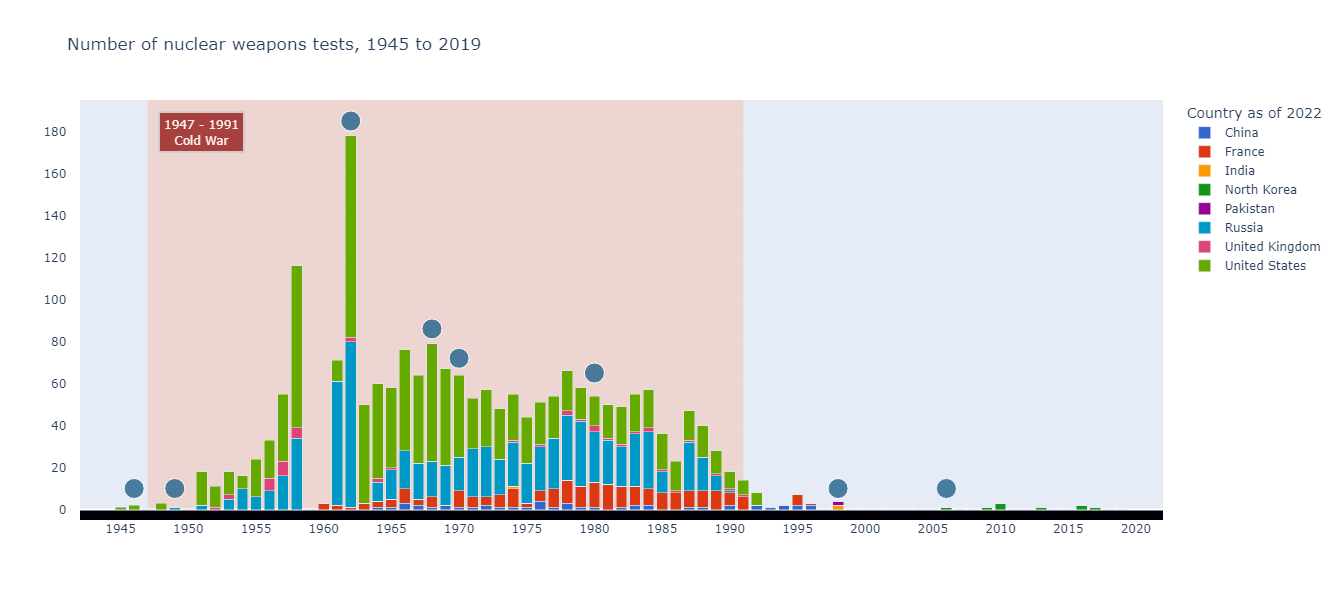

In [12]:
fig3 = px.bar(
    data_frame=df3.sort_values(by=["country_name"]),
    x=df3["year"],
    y=df3["nuclear_weapons_tests"],
    color=df3["country_name"],
    barmode="stack",
    height=600,
    hover_name=df3["country_name"],
    #hover_data="Test <extra></extra>",
    #labels=,
    title="Number of nuclear weapons tests, 1945 to 2019",
    labels={"color": "Country as of 2022", "x": "", "y": ""},
    color_discrete_sequence=px.colors.qualitative.G10
)

hovertemp="%{x}<br>%{y}"

fig3.update_traces(hovertemplate=hovertemp)

fig3.update_layout(
    xaxis=dict(
        range=[1942,2022],
        ticklabelstep=5,
        tickangle=0,
        tickmode="linear",
        showgrid=False,
        #position=0,
        #anchor="free"
    ),
    yaxis=dict(
        #tickmode="linear",
        #tick0=20,
        #ticklabelstep=20,
        dtick=20,
        range=[-5,195],
        #showgrid=False,
        griddash="solid",
        gridwidth=0.05,
        #ticklabelstep=20,
        tickson="boundaries",
        ticksuffix="   ",
        #minor=dict(
        #    dtick=0.1,
        #    tick0=20),
        #tickmode="auto"
            
))

#fig3.update_yaxes(ticksuffix = "   ")

########## Cold War ##########

fig3.add_vrect(
    x0="1947", x1="1991",
    fillcolor="LightSalmon", opacity=0.3,
    layer="below", line_width=0,
),

fig3.add_annotation(
        x=1951,
        y=180,
        xref="x",
        yref="y",
        text="1947 - 1991<br>Cold War",
        showarrow=False,
        font=dict(
            #family="Courier New, monospace",
            size=12,
            color="#ffffff"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        #ax=65,
        #ay=-80,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="DarkRed",
        opacity=0.7
        )

fig3.add_hrect(
    y0=-5, y1=0,
    fillcolor="#010008", opacity=1,
    layer="below", line_width=0,
),

fig3.add_scatter(
    x=[1946],
    y=[10],
    name="1945",
    showlegend=False,
    hovertemplate="<b>1945:</b><br>Atomic bombings of Hiroshima and Nagasaki<extra></extra>",
    marker=dict(
        size=20,
        color="#21618C",
        opacity=0.8,
        line_color="white",
        line_width=1,
))

fig3.add_scatter(
    x=[1949],
    y=[10],
    name="1949",
    showlegend=False,
    hovertemplate="<b>1949:</b><br>First successful test by USSR<extra></extra>",
    marker=dict(
        size=20,
        color="#21618C",
        opacity=0.8,
        line_color="white",
        line_width=1,
))

fig3.add_scatter(
    x=[1962],
    y=[185],
    name="1962",
    showlegend=False,
    hovertemplate="<b>1962:</b><br>Cuban Missile Crisis<extra></extra>",
    marker=dict(
        size=20,
        color="#21618C",
        opacity=0.8,
        line_color="white",
        line_width=1,
))

fig3.add_scatter(
    x=[1968],
    y=[86],
    name="1968",
    showlegend=False,
    hovertemplate="<b>1968:</b><br>Non-Proliferation Treaty<extra></extra>",
    marker=dict(
        size=20,
        color="#21618C",
        opacity=0.8,
        line_color="white",
        line_width=1,
))

fig3.add_scatter(
    x=[1970],
    y=[72],
    name="1969",
    showlegend=False,
    hovertemplate="<b>1969:</b><br>Détente began in 1969, as a core element of the foreign policy<br>of president Richard Nixon and his top advisor Henry Kissinger. They wanted to end<br>the containment policy and gain friendlier relations with the USSR and China.<extra></extra>",
    marker=dict(
        size=20,
        color="#21618C",
        opacity=0.8,
        line_color="white",
        line_width=1,
))

fig3.add_scatter(
    x=[1980],
    y=[65],
    name="1979",
    showlegend=False,
    hovertemplate="<b>1979:</b><br>Cold War flares up after Soviet invasion of Afghanistan<extra></extra>",
    marker=dict(
        size=20,
        color="#21618C",
        opacity=0.8,
        line_color="white",
        line_width=1,
))

fig3.add_scatter(
    x=[1998],
    y=[10],
    name="1998",
    showlegend=False,
    hovertemplate="<b>1998:</b><br>India test detonated five nuclear weapons. Domestic pressure<br>within Pakistan began to build which resulted in detonating six nuclear weapons.<extra></extra>",
    marker=dict(
        size=20,
        color="#21618C",
        opacity=0.8,
        line_color="white",
        line_width=1,
))

fig3.add_scatter(
    x=[2006],
    y=[10],
    name="2006",
    showlegend=False,
    hovertemplate="<b>2006:</b><br>First successful test by North Korea<extra></extra>",
    marker=dict(
        size=20,
        color="#21618C",
        opacity=0.8,
        line_color="white",
        line_width=1,
))

fig3.show()

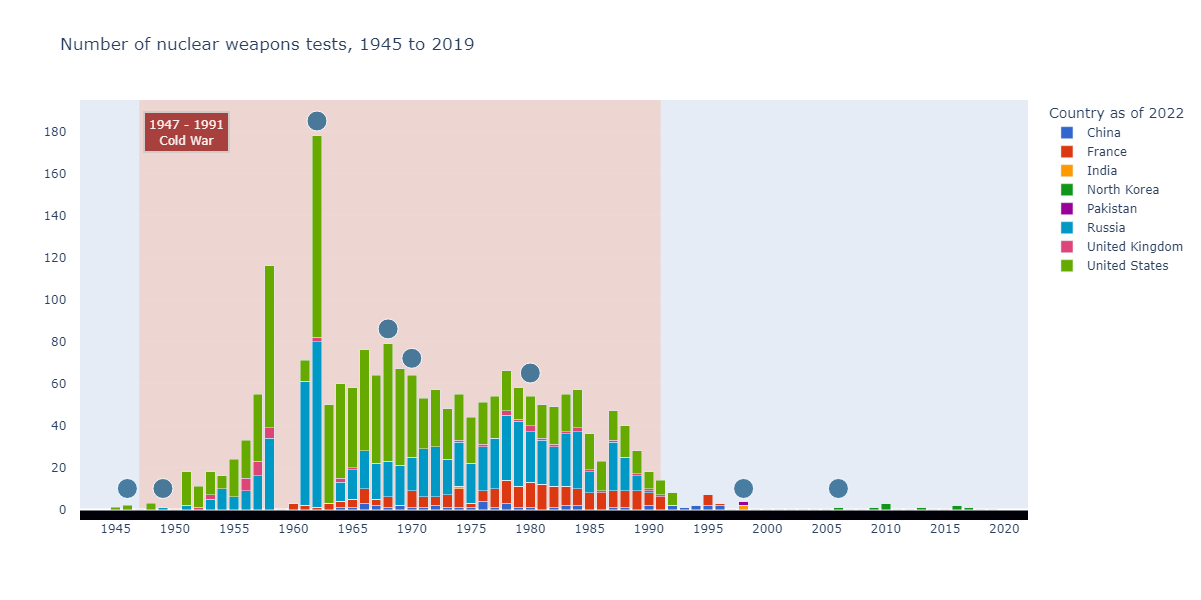

In [366]:
title="Number of nuclear weapons tests, 1945 to 2019"
description="This interactive chart shows the number of nuclear weapons tests conducted since 1945. We can see that the Cold War was a very active period of nuclear weapons development. Although nuclear weapons were only ever used in warfare during the Second World War, there have been many tests conducted since then."

def kbplot():

    fig3 = px.bar(
        data_frame=df3.sort_values(by=["country_name"]),
        x=df3["year"],
        y=df3["nuclear_weapons_tests"],
        color=df3["country_name"],
        barmode="stack",
        height=600,
        hover_name=df3["country_name"],
        #hover_data="Test <extra></extra>",
        #labels=,
        title="Number of nuclear weapons tests, 1945 to 2019",
        labels={"color": "Country as of 2022", "x": "", "y": ""},
        color_discrete_sequence=px.colors.qualitative.G10
    )

    hovertemp="%{y}"

    fig3.update_traces(hovertemplate=hovertemp)

    fig3.update_layout(
        xaxis=dict(
            range=[1942,2022],
            ticklabelstep=5,
            tickangle=0,
            tickmode="linear",
            showgrid=False,
            #position=0,
            #anchor="free"
        ),
        yaxis=dict(
            #tickmode="linear",
            #tick0=20,
            #ticklabelstep=20,
            dtick=20,
            range=[-5,195],
            #showgrid=False,
            griddash="solid",
            gridwidth=0.05,
            #ticklabelstep=20,
            tickson="boundaries",
            ticksuffix="   ",
            #minor=dict(
            #    dtick=0.1,
            #    tick0=20),
            #tickmode="auto"

    ))

    #fig3.update_yaxes(ticksuffix = "   ")

    ########## Cold War ##########

    fig3.add_vrect(
        x0="1947", x1="1991",
        fillcolor="LightSalmon", opacity=0.3,
        layer="below", line_width=0,
    ),

    fig3.add_annotation(
            x=1951,
            y=180,
            xref="x",
            yref="y",
            text="1947 - 1991<br>Cold War",
            showarrow=False,
            font=dict(
                #family="Courier New, monospace",
                size=12,
                color="#ffffff"
                ),
            align="center",
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            arrowcolor="#636363",
            #ax=65,
            #ay=-80,
            bordercolor="#c7c7c7",
            borderwidth=2,
            borderpad=4,
            bgcolor="DarkRed",
            opacity=0.7
            )

    fig3.add_hrect(
        y0=-5, y1=0,
        fillcolor="#010008", opacity=1,
        layer="below", line_width=0,
    ),

    fig3.add_scatter(
        x=[1946],
        y=[10],
        name="1945",
        showlegend=False,
        hovertemplate="<b>1945:</b><br>Atomic bombings of Hiroshima and Nagasaki<extra></extra>",
        marker=dict(
            size=20,
            color="#21618C",
            opacity=0.8,
            line_color="white",
            line_width=1,
    ))

    fig3.add_scatter(
        x=[1949],
        y=[10],
        name="1949",
        showlegend=False,
        hovertemplate="<b>1949:</b><br>First successful test by USSR<extra></extra>",
        marker=dict(
            size=20,
            color="#21618C",
            opacity=0.8,
            line_color="white",
            line_width=1,
    ))

    fig3.add_scatter(
        x=[1962],
        y=[185],
        name="1962",
        showlegend=False,
        hovertemplate="<b>1962:</b><br>Cuban Missile Crisis<extra></extra>",
        marker=dict(
            size=20,
            color="#21618C",
            opacity=0.8,
            line_color="white",
            line_width=1,
    ))

    fig3.add_scatter(
        x=[1968],
        y=[86],
        name="1968",
        showlegend=False,
        hovertemplate="<b>1968:</b><br>Non-Proliferation Treaty<extra></extra>",
        marker=dict(
            size=20,
            color="#21618C",
            opacity=0.8,
            line_color="white",
            line_width=1,
    ))

    fig3.add_scatter(
        x=[1970],
        y=[72],
        name="1969",
        showlegend=False,
        hovertemplate="<b>1969:</b><br>Détente began in 1969, as a core element of the foreign policy<br>of president Richard Nixon and his top advisor Henry Kissinger. They wanted to end<br>the containment policy and gain friendlier relations with the USSR and China.<extra></extra>",
        marker=dict(
            size=20,
            color="#21618C",
            opacity=0.8,
            line_color="white",
            line_width=1,
    ))

    fig3.add_scatter(
        x=[1980],
        y=[65],
        name="1979",
        showlegend=False,
        hovertemplate="<b>1979:</b><br>Cold War flares up after Soviet invasion of Afghanistan<extra></extra>",
        marker=dict(
            size=20,
            color="#21618C",
            opacity=0.8,
            line_color="white",
            line_width=1,
    ))

    fig3.add_scatter(
        x=[1998],
        y=[10],
        name="1998",
        showlegend=False,
        hovertemplate="<b>1998:</b><br>India test detonated five nuclear weapons. Domestic pressure<br>within Pakistan began to build which resulted in detonating six nuclear weapons.<extra></extra>",
        marker=dict(
            size=20,
            color="#21618C",
            opacity=0.8,
            line_color="white",
            line_width=1,
    ))

    fig3.add_scatter(
        x=[2006],
        y=[10],
        name="2006",
        showlegend=False,
        hovertemplate="<b>2006:</b><br>First successful test by North Korea<extra></extra>",
        marker=dict(
            size=20,
            color="#21618C",
            opacity=0.8,
            line_color="white",
            line_width=1,
    ))    

    key=""
    info_dict=dict(title=title, description=description, lib="plotly_express")
    tuple=(key,fig3,info_dict)
    return tuple

def get_plots():
    rlist =[kbplot()]
    #rlist =[kbplot(),kbplot2()] #kbplot2 definieren!
    return rlist

testplot = kbplot()
testplot[1].show()

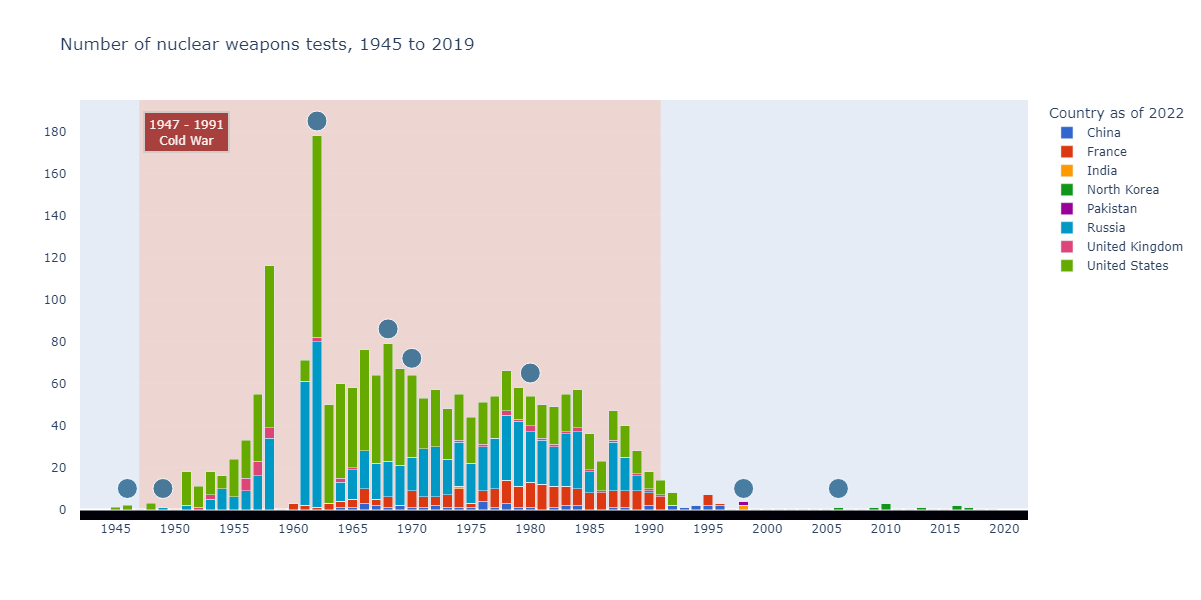

In [367]:
testplot = kbplot()
testplot[1].show()